In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db= mysql.connector.connect( host = "localhost",
                           username = "root",
                           password = "Welcome098@",
                           database = "ecommerce")
cur = db.cursor()


# list all unique cities where customers are located   

In [29]:
query = """select distinct (customer_city) from customers"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# count the number of orders placed in 2017

In [7]:
query = """select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data = cur.fetchall()
data

[(45101,)]

# find the total sales per category

In [13]:
query = """select products.product_category category,
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id=order_items.product_id
join payments on payments.order_id= order_items.order_id
group by category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["category","sales"])
df


,category,sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# calculate the percentage of orders that were paid in installments

In [21]:
query = """select (sum(case when payment_installments >=1 
then 1 else 0 end)/count(*)*100) from payments"""


cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# count number of customers from each state 

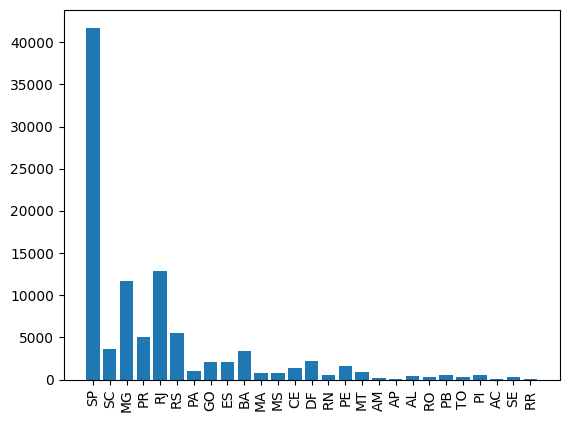

In [28]:
query = """select customer_state,count(customer_id) from customers
group by customer_state"""


cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data , columns=["state","customer_count"])
plt.xticks(rotation=90)
plt.bar(df["state"],df["customer_count"])
plt.show()

# calculate the number of orders per month in 2018

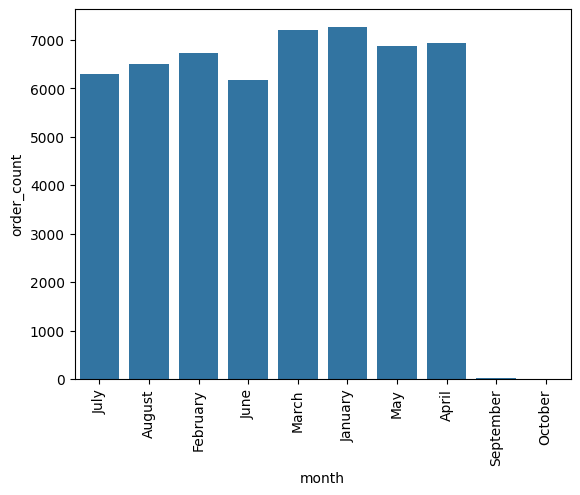

In [35]:
query = """select monthname(order_purchase_timestamp)months , count(order_id)order_count from orders where year(order_purchase_timestamp)=2018
group by months"""


cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["month","order_count"])
sns.barplot(x=df["month"],y=df["order_count"],data=df)
plt.xticks(rotation=90)
plt.show()

# find the average number of products per order, grouped by customer city.

In [38]:
query = """with count_per_order as
(select orders.order_id,orders.customer_id,count(order_items.order_id)as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2)average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city;"""


cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data)
df.head(10)

,0,1
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25
